<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/ex_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm

from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('https://github.com/iam-fern/Research/raw/main/generate_datanew.csv', index_col=['Replicate', 'no'])
df

Xt1       Xt2       Xt3             e         Y
Replicate no                                                      
1         1   0.755341  0.301218 -0.937971 -9.568571e-03  1.367698
          2   0.143752 -0.861772 -1.542539 -4.276801e-01 -3.215977
          3  -0.569876 -0.812114 -1.124769  8.615647e-01 -0.633723
          4   0.006066 -0.297299 -0.148308  8.256490e-04  3.023397
          5  -0.473473 -0.026203  0.466757  8.600000e-07  5.451632
...                ...       ...       ...           ...       ...
100       26  0.840966 -0.003035 -1.242215  1.480000e-10 -0.140140
          27  1.241764 -0.576958  1.445442 -3.989538e-02  8.794963
          28 -1.058109 -0.571064  0.211047  7.656499e-02  3.556496
          29 -0.013071 -0.561579  0.171033 -2.622112e-02  3.741900
          30 -1.058767 -0.178490  0.907317  4.637470e-04  6.575562

[3000 rows x 5 columns]

In [3]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

Xt1       Xt2       Xt3             e         Y
Replicate no                                                      
1         1   0.755341  0.301218 -0.937971 -9.568571e-03  1.367698
          2   0.143752 -0.861772 -1.542539 -4.276801e-01 -3.215977
          3  -0.569876 -0.812114 -1.124769  8.615647e-01 -0.633723
          4   0.006066 -0.297299 -0.148308  8.256490e-04  3.023397
          5  -0.473473 -0.026203  0.466757  8.600000e-07  5.451632
...                ...       ...       ...           ...       ...
100       26  0.840966 -0.003035 -1.242215  1.480000e-10 -0.140140
          27  1.241764 -0.576958  1.445442 -3.989538e-02  8.794963
          28 -1.058109 -0.571064  0.211047  7.656499e-02  3.556496
          29 -0.013071 -0.561579  0.171033 -2.622112e-02  3.741900
          30 -1.058767 -0.178490  0.907317  4.637470e-04  6.575562

[3000 rows x 5 columns]

In [4]:
table.reset_index(inplace=True)
table

,Replicate,no,Xt1,Xt2,Xt3,e,Y
0,1,1,0.755341,0.301218,-0.937971,-9.568571e-03,1.367698
1,1,2,0.143752,-0.861772,-1.542539,-4.276801e-01,-3.215977
2,1,3,-0.569876,-0.812114,-1.124769,8.615647e-01,-0.633723
3,1,4,0.006066,-0.297299,-0.148308,8.256490e-04,3.023397
4,1,5,-0.473473,-0.026203,0.466757,8.600000e-07,5.451632
...,...,...,...,...,...,...,...
2995,100,26,0.840966,-0.003035,-1.242215,1.480000e-10,-0.140140
2996,100,27,1.241764,-0.576958,1.445442,-3.989538e-02,8.794963
2997,100,28,-1.058109,-0.571064,0.211047,7.656499e-02,3.556496
2998,100,29,-0.013071,-0.561579,0.171033,-2.622112e-02,3.741900


In [5]:
table.set_index(['Replicate', 'no'], inplace=True)

In [6]:
table

Xt1       Xt2       Xt3             e         Y
Replicate no                                                      
1         1   0.755341  0.301218 -0.937971 -9.568571e-03  1.367698
          2   0.143752 -0.861772 -1.542539 -4.276801e-01 -3.215977
          3  -0.569876 -0.812114 -1.124769  8.615647e-01 -0.633723
          4   0.006066 -0.297299 -0.148308  8.256490e-04  3.023397
          5  -0.473473 -0.026203  0.466757  8.600000e-07  5.451632
...                ...       ...       ...           ...       ...
100       26  0.840966 -0.003035 -1.242215  1.480000e-10 -0.140140
          27  1.241764 -0.576958  1.445442 -3.989538e-02  8.794963
          28 -1.058109 -0.571064  0.211047  7.656499e-02  3.556496
          29 -0.013071 -0.561579  0.171033 -2.622112e-02  3.741900
          30 -1.058767 -0.178490  0.907317  4.637470e-04  6.575562

[3000 rows x 5 columns]

In [11]:
table_data = pd.DataFrame({'Xt1' : table['Xt1'],
                           'Xt2' : table['Xt2'],
                           'Xt3' : table['Xt3'],
                           'Y'   : table['Y']})

# y_hat = b0 + b1x1 + b2x2 + … + bkxk
table_data['Y_hat'] = 4 + 0.4*table_data['Xt1'] + 1.5*table_data['Xt2'] + 3.6*table_data['Xt3']
table_data['e_hat'] = table_data['Y'] - table_data['Y_hat']
table_data

Xt1       Xt2       Xt3         Y     Y_hat         e_hat
Replicate no                                                                
1         1   0.755341  0.301218 -0.937971  1.367698  1.377266 -9.568572e-03
          2   0.143752 -0.861772 -1.542539 -3.215977 -2.788297 -4.276801e-01
          3  -0.569876 -0.812114 -1.124769 -0.633723 -1.495287  8.615647e-01
          4   0.006066 -0.297299 -0.148308  3.023397  3.022571  8.256491e-04
          5  -0.473473 -0.026203  0.466757  5.451632  5.451631  8.594000e-07
...                ...       ...       ...       ...       ...           ...
100       26  0.840966 -0.003035 -1.242215 -0.140140 -0.140140  2.999999e-10
          27  1.241764 -0.576958  1.445442  8.794963  8.834858 -3.989538e-02
          28 -1.058109 -0.571064  0.211047  3.556496  3.479931  7.656499e-02
          29 -0.013071 -0.561579  0.171033  3.741900  3.768121 -2.622112e-02
          30 -1.058767 -0.178490  0.907317  6.575562  6.575098  4.637468e-04

[3000 rows x 6 columns]

In [13]:
# แสดงค่าของ Replicate ที่ 1.0
new_table = table_data.loc[1]
new_table

,Xt1,Xt2,Xt3,Y,Y_hat,e_hat
no,,,,,,
1,0.755341,0.301218,-0.937971,1.367698,1.377266,-9.568572e-03
2,0.143752,-0.861772,-1.542539,-3.215977,-2.788297,-4.276801e-01
3,-0.569876,-0.812114,-1.124769,-0.633723,-1.495287,8.615647e-01
4,0.006066,-0.297299,-0.148308,3.023397,3.022571,8.256491e-04
5,-0.473473,-0.026203,0.466757,5.451632,5.451631,8.594000e-07
6,2.085001,-0.774632,1.630135,9.849481,9.540539,3.089427e-01
7,0.710373,0.749741,-0.381059,3.959441,4.036948,-7.750723e-02
8,0.032693,0.343683,-0.601482,2.364855,2.363268,1.587297e-03
9,0.730683,-0.146299,-1.262402,-0.471826,-0.471824,-1.659600e-06


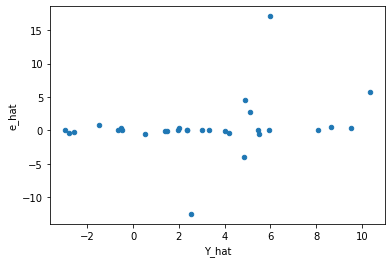

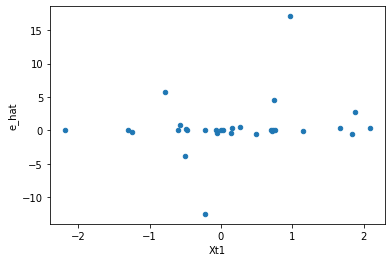

In [20]:
new_table.plot(x ='Y_hat', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt1', y='e_hat', kind = 'scatter')

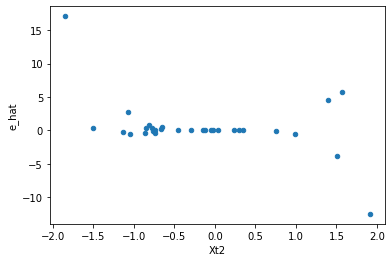

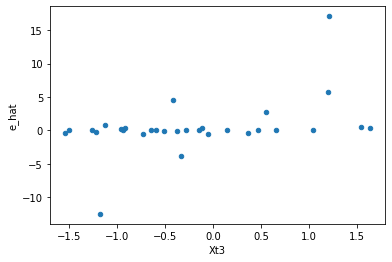

In [21]:
new_table.plot(x ='Xt2', y='e_hat', kind = 'scatter')
new_table.plot(x ='Xt3', y='e_hat', kind = 'scatter')